In [108]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [109]:
data1 = pd.read_csv("Datasets/Posti_letto_per_struttura_ospedaliera_2020.csv", sep=";",encoding='cp1252')
postiLetto2020Regioni=data1[["Descrizione Regione","Totale posti letto"]]
postiLetto2020Regioni=postiLetto2020Regioni.groupby(['Descrizione Regione']).sum()
trentino=postiLetto2020Regioni[postiLetto2020Regioni.index=='PROV. AUTON. BOLZANO']['Totale posti letto'].iloc[0]+postiLetto2020Regioni[postiLetto2020Regioni.index=='PROV. AUTON. TRENTO']['Totale posti letto'].iloc[0]
postiLetto2020Regioni=postiLetto2020Regioni.drop('PROV. AUTON. BOLZANO')
postiLetto2020Regioni=postiLetto2020Regioni.drop('PROV. AUTON. TRENTO')
postiLetto2020Regioni.loc['Trentino Alto Adige'] = trentino
postiLetto2020Regioni.sort_index(inplace=True)
postiLetto2020Regioni.head()

,Totale posti letto
Descrizione Regione,
ABRUZZO,4323
BASILICATA,1804
CALABRIA,5721
CAMPANIA,17184
EMILIA ROMAGNA,15869


In [110]:
popolazioneRegioni2020=pd.read_csv("Datasets/Popolazione_Regioni_2020.csv", sep=",")
popolazioneRegioni2020.head()
popolazioneRegioni2020 = popolazioneRegioni2020.groupby(['Territorio']).sum()
popolazioneRegioni2020 = popolazioneRegioni2020[["Value"]]
popolazioneRegioni2020= popolazioneRegioni2020.rename(columns={'Value':'Totale abitanti'})
popolazioneRegioni2020.sort_index(inplace=True)
popolazioneRegioni2020= popolazioneRegioni2020.drop('Provincia Autonoma Bolzano / Bozen')
popolazioneRegioni2020=popolazioneRegioni2020.drop('Provincia Autonoma Trento')
popolazioneRegioni2020 =popolazioneRegioni2020.set_index(postiLetto2020Regioni.index)

In [111]:
postiLetto2020norm = [x[1]["Totale posti letto"] / popolazioneRegioni2020.loc[x[0]].values[0] *1000 for x in postiLetto2020Regioni.iterrows()]

In [112]:
regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana','Trentino-Alto Adige', 'Umbria', 'Valle d\'Aosta',
       'Veneto']
postiLetto2020norm = pd.DataFrame([regions,postiLetto2020norm]).transpose()
postiLetto2020norm.columns = ['region','quantity']
postiLetto2020norm.head()

,region,quantity
0,Abruzzo,0.835239
1,Basilicata,0.815177
2,Calabria,0.755104
3,Campania,0.752082
4,Emilia-Romagna,0.888697


In [113]:
#DATI NORMALIZZATI!!!!!!!!!
# gdf = gpd.read_file(filename=r'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_municipalities.geojson')
# gdf = gdf.dissolve(by='reg_name') #The geojson is to detailed, dissolve boundaries by reg_name attribute
# gdf = gdf.reset_index()
# gdf = pd.merge(left=gdf, right=postiLetto2020norm, how='left', left_on='reg_name', right_on='region')
# ax = gdf.plot(column="quantity",figsize=(15, 10),cmap='OrRd');
# ax.set_axis_off();

In [114]:
lettiMap_norm = postiLetto2020norm.set_index('region').T.to_dict("list")

for key in lettiMap_norm:
    lettiMap_norm[key] = lettiMap_norm[key][0]

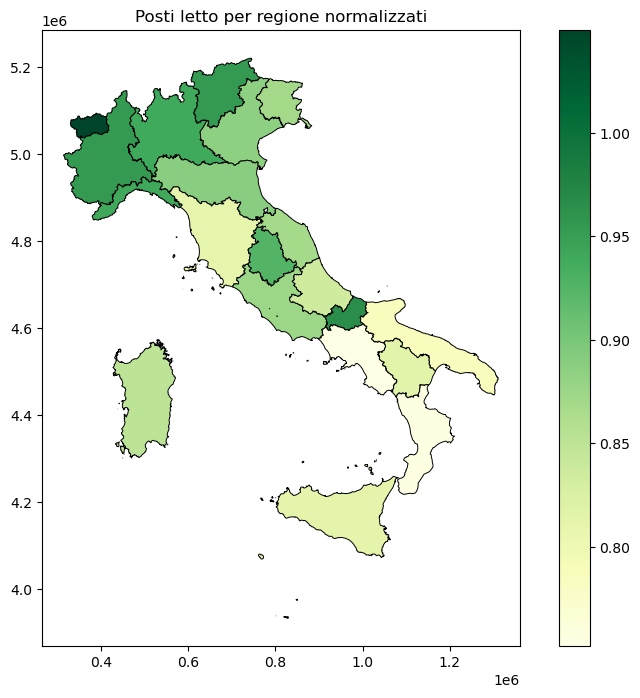

In [115]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile of Italy's regions
italy_regions = gpd.read_file('italy_regions.shp')

# Merge population data with shapefile
italy_regions['beds_norm'] = italy_regions['DEN_REG'].map(lettiMap_norm)

# Plot the map
italy_regions.plot(column='beds_norm', cmap='YlGn', edgecolor="black", figsize=(10, 8), linewidth=.7, legend=True)
plt.title('Posti letto per regione normalizzati')
plt.show()

In [137]:
regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana','Trentino-Alto Adige', 'Umbria', 'Valle d\'Aosta',
       'Veneto']

lettiMap = {}
for i in range(len(regions)):
    lettiMap[regions[i]] = postiLetto2020Regioni.iloc[i]["Totale posti letto"]

lettiMap

{'Abruzzo': 4323,
 'Basilicata': 1804,
 'Calabria': 5721,
 'Campania': 17184,
 'Emilia-Romagna': 15869,
 'Friuli Venezia Giulia': 4198,
 'Lazio': 20155,
 'Liguria': 5742,
 'Lombardia': 37668,
 'Marche': 5257,
 'Molise': 1162,
 'Piemonte': 16442,
 'Puglia': 12431,
 'Sardegna': 5483,
 'Sicilia': 15846,
 'Toscana': 12000,
 'Trentino-Alto Adige': 4111,
 'Umbria': 3222,
 "Valle d'Aosta": 525,
 'Veneto': 17276}

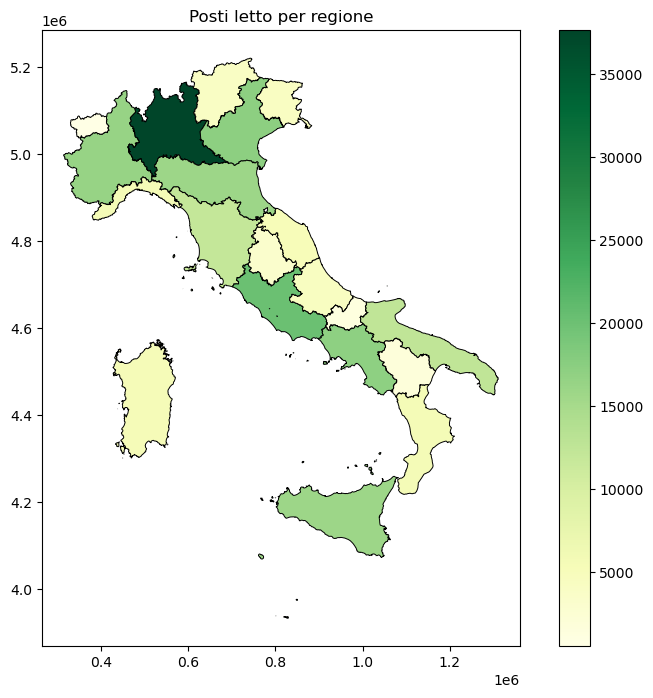

In [140]:
# Load shapefile of Italy's regions
italy_regions = gpd.read_file('italy_regions.shp')

# Merge population data with shapefile
italy_regions['beds'] = italy_regions['DEN_REG'].map(lettiMap)

# Plot the map
italy_regions.plot(column='beds', cmap='YlGn', edgecolor="black", figsize=(10, 8), linewidth=.7, legend=True)
plt.title('Posti letto per regione')
plt.show()